In [1]:
import json 
import os

In [4]:
from pathlib import Path
import shutil
from typing import List, Dict

SOURCE_ROOT = Path(
    "/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5"
)
TARGET_ROOT = Path("/home/mprabhud/shantanu/suppl_vis/assets/prompt_samples")
TARGET_SAMPLE = "sample01"

# Each entry describes which prompt folder to pull from and how to rename the assets
COPY_PLAN: List[Dict] = [
    {
        "prompt_id": "239",
        "model_suffix": "gemini",
        "baseline_file": "iter_1_parallel_{max_edit_steps}_best_image.png",
        "method_file": "iter_16_parallel_1_best_image.png",
        "trace_dir": "iterative_16_parallel_0",
    },
    {
        "prompt_id": "240",
        "model_suffix": "gpt",
        "baseline_file": "iter_1_parallel_{max_edit_steps}_best_image.png",
        "method_file": "iter_16_parallel_1_best_image.png",
        "trace_dir": "iterative_16_parallel_0",
    },
    {
        "prompt_id": "222",
        "model_suffix": "qwen",
        "baseline_file": "iter_1_parallel_{max_edit_steps}_best_image.png",
        "method_file": "iter_16_parallel_1_best_image.png",
        "trace_dir": "iterative_16_parallel_0",
    },
]


def safe_copy(src: Path, dst: Path) -> None:
    try:
        if not src.exists():
            print(f"⚠️  Source file not found: {src}")
            return
        dst.parent.mkdir(parents=True, exist_ok=True)
        shutil.copy2(src, dst)
        print(f"✓ Copied {src} → {dst}")
    except Exception as e:
        print(f"✗ Error copying {src}: {e}")


def copy_variant(plan: Dict) -> None:
    try:
        src_dir = SOURCE_ROOT / plan["prompt_id"]
        if not src_dir.exists():
            print(f"⚠️  Source directory not found: {src_dir}")
            return
            
        dst_dir = TARGET_ROOT / TARGET_SAMPLE
        model_suffix = plan["model_suffix"]

        baseline_src = src_dir / plan["baseline_file"]
        method_src = src_dir / plan["method_file"]

        safe_copy(baseline_src, dst_dir / f"baseline_{model_suffix}.png")
        safe_copy(method_src, dst_dir / f"method_{model_suffix}.png")

        trace_dir = src_dir / plan["trace_dir"]
        if not trace_dir.exists():
            print(f"⚠️  Trace directory not found: {trace_dir}")
        else:
            trace_images = sorted(trace_dir.glob("step_*.png"))
            if not trace_images:
                print(f"⚠️  No trace images found in {trace_dir}")
            for idx, trace_path in enumerate(trace_images, start=1):
                trace_name = dst_dir / f"trace_{model_suffix}_{idx:02}.png"
                safe_copy(trace_path, trace_name)
    except Exception as e:
        print(f"✗ Error processing variant {plan.get('model_suffix', 'unknown')}: {e}")


for entry in COPY_PLAN:
    copy_variant(entry)

print("\nDone copying assets into", TARGET_ROOT / TARGET_SAMPLE)


✓ Copied /grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/239/iter_1_parallel_{max_edit_steps}_best_image.png → /home/mprabhud/shantanu/suppl_vis/assets/prompt_samples/sample01/baseline_gemini.png
✓ Copied /grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/239/iter_16_parallel_1_best_image.png → /home/mprabhud/shantanu/suppl_vis/assets/prompt_samples/sample01/method_gemini.png
✓ Copied /grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/239/iterative_16_parallel_0/step_0.png → /home/mprabhud/shantanu/suppl_vis/assets/prompt_samples/sample01/trace_gemini_01.png
✓ Copied /grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/239/iterative_16_parallel_0/step_1.png → /home/mprabhud/shantanu/suppl_vis/assets/prompt_samples/sample0

In [18]:
x = os.listdir("/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7")

In [ ]:
for item in os.listdir(folder_path):
            if item.startswith('iter_') and item.endswith('_parallel_0'):
                potential_path = os.path.join(folder_path, item, 'text_log.txt')
                if os.path.exists(potential_path):
                    text_log_path = potential_path
                    break

In [39]:
prompt_to_struct = {}
win_cases_for_ours_prompts = {}
draw_or_lose_cases_for_ours_prompts = {}
for f in x:
    folder_path = os.path.join("/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5", f)
    
    # Check if it's a directory
    if not os.path.isdir(folder_path):
        continue
    
    # Load struct_wise_sample_scores.json
    scores_file = os.path.join(folder_path, "struct_wise_sample_scores.json")
    if not os.path.exists(scores_file):
        continue
    
    with open(scores_file, 'r') as sf:
        scores = json.load(sf)
    
    # Load prompt.json
    prompt_file = os.path.join(folder_path, "prompt.json")
    if not os.path.exists(prompt_file):
        continue
    
    with open(prompt_file, 'r') as pf:
        prompt_data = json.load(pf)
        prompt = prompt_data
    
    # Extract our method score and baseline score
    our_score = scores.get("iter_8_parallel_2")
    baseline_score = scores.get("iter_1_parallel_{max_edit_steps}")
    
    # Skip if either score is missing
    if our_score is None or baseline_score is None:
        continue
    
    # Construct image paths
    baseline_img_path = os.path.join(folder_path, "iter_1_parallel_{max_edit_steps}", "final_image.png")
    ours_img_path = os.path.join(folder_path, "iter_8_parallel_2", "final_image.png")
    
    # Create the struct
    struct = {
        'id': f,
        'our_score': our_score,
        'baseline_score': baseline_score,
        'baseline_img_path': baseline_img_path,
        'ours_img_path': ours_img_path,
        'questions_list': [],
        'question_wise_baseline_scores': [],
        'question_wise_our_scores': []
    }
    
    # Store in prompt_to_struct
    prompt_to_struct[prompt] = struct
    
    # Categorize as win, draw, or lose
    if our_score > baseline_score:
        win_cases_for_ours_prompts[prompt] = struct
    else:
        draw_or_lose_cases_for_ours_prompts[prompt] = struct


In [41]:
prompt_to_struct['An abstract image features a truck positioned lower in the scene, with a spider placed directly above it but not touching. Additionally, there is a chicken with a metallic texture present in the composition.']

{'id': '48',
 'our_score': 0.8333333333333334,
 'baseline_score': 0.8333333333333334,
 'baseline_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/48/iter_1_parallel_{max_edit_steps}/final_image.png',
 'ours_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=5_qwen_run_with_gemini_flash_proposer/conceptmix_k5/48/iter_8_parallel_2/final_image.png',
 'questions_list': [],
 'question_wise_baseline_scores': [],
 'question_wise_our_scores': []}

In [30]:
keys = list(prompt_to_struct.keys())

In [ ]:
prompt_to_struct['Four']

KeyError: 'Four ducks are standing on the ground, and a tiny pink giraffe is standing next to them. Three novels are placed on the ground nearby. The image is in a photorealistic style.'

In [38]:
prompt_to_struct['The image features a heart-shaped giraffe, a tiny pink screwdriver, and a huge robot. The screwdriver is positioned at the bottom of the robot, touching it.']

{'id': '5',
 'our_score': 1.0,
 'baseline_score': 0.625,
 'baseline_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/5/iter_1_parallel_{max_edit_steps}/final_image.png',
 'ours_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/5/iter_8_parallel_2/final_image.png',
 'questions_list': [],
 'question_wise_baseline_scores': [],
 'question_wise_our_scores': []}

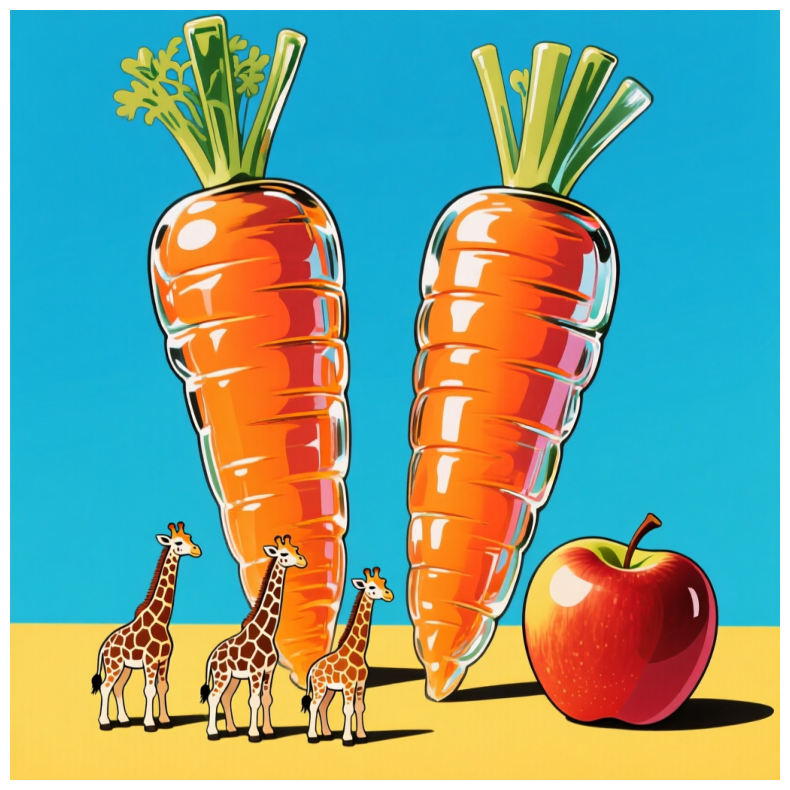

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/273/iter_8_parallel_2_best_image.png'
img = Image.open(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [32]:
print(keys)

['The image shows a purple chair positioned on the left side of a box. Inside the box, there are four metallic, circle-shaped necklaces.', 'In the expressionist image, there are exactly three huge, triangle-shaped houses with a metallic texture and white color. Above these houses, there is a tree positioned higher without touching them.', 'An oil painting shows a brown pine tree, a metallic-textured truck, a chair, and a sunflower. The sunflower is positioned on top of the chair, with the two touching each other.', 'An abstract image depicts a fluffy apple with a triangular-shaped spider positioned outside its boundaries. A screwdriver is placed directly at the bottom of the apple, making contact with it.', 'In a cartoon-style image, a tiny, circle-shaped cow sits on a chair. A man stands nearby, holding a piece of sushi. A bee is flying above the scene.', 'The image depicts an abstract scene with three huge, orange, triangle-shaped novels that have a glass texture. These novels are po

In [33]:
keys1 = list(win_cases_for_ours_prompts.keys())

In [25]:
os.listdir('/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/273')

['struct_wise_sample_scores.json',
 'iterative_8_parallel_0',
 'iterative_16_parallel_0',
 'iter_16_parallel_1_best_image.png',
 'iter_1_parallel_{max_edit_steps}_best_image.png',
 'parallel_outputs',
 'iter_8_parallel_2_best_image.png',
 'prompt.json',
 'iter_parallel_scores.json',
 'iterative_8_parallel_1']

In [34]:
print(keys1)

['The image shows a purple chair positioned on the left side of a box. Inside the box, there are four metallic, circle-shaped necklaces.', 'The image shows a man standing to the left of a lion. There are three huge rings visible in the scene. Additionally, a spoon with a glass texture is also present.', 'In the image, there is a black, rectangular textbook. Positioned at the bottom of the textbook, touching it, is a fork. Additionally, there is a car present. The style of the image is an oil painting.', 'The image shows two gray spiders with a fluffy texture. A tiny fork with a fluffy texture is positioned on the right side of one of the spiders.', 'In a cubism-style image, there is a metallic-textured laptop, a tiny glass-textured carrot, a piece of sushi, an apple, and a dog.', 'In a pop art style image, there are two huge glass-textured carrots. In front of the carrots, there are three tiny giraffes. Additionally, there is an apple included in the scene.', 'The image shows a waterco

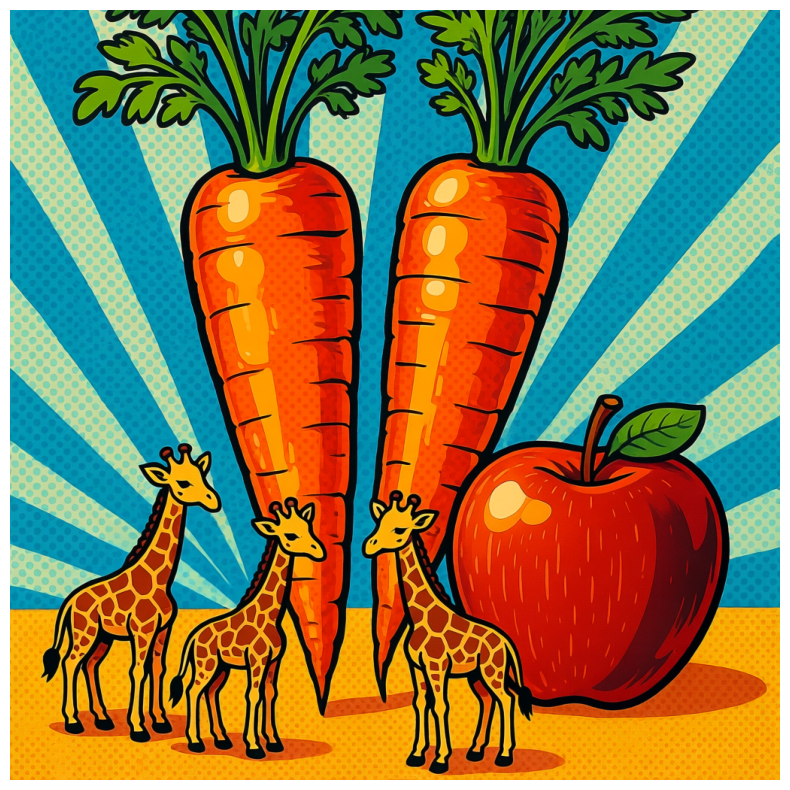

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/273/iter_1_parallel_{max_edit_steps}_best_image.png'
img = Image.open(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [20]:
# Parse the text log to extract prompt and questions

text_log = """
Save image path: ./conceptmix_parallel_and_iterative_k=7_gpt_run_with_gemini_flash_proposer/./conceptmix_k7/173/iterative_8_parallel_0/step_0.png



--------------------------------

Verifier scores: [('Does the image contain car?', 1), ('Does the image contain pine tree?', 1), ('Does the image contain orange?', 1), ('Is the style of the image pixel art?', 1), ('Is the style of the image pop art?', 0), ('Is the pine tree rectangle shaped?', 0), ('Is the style of the image abstract?', 0), ('Is the car rectangle shaped?', 1), ('Cumulative mean binary score:', 0.625)]

--------------------------------

Running step 1 of 8:--------------------------------

Next step system prompt: You are a helpful assistant that given a complex image generation prompt and previously generated image along with verifier scores (sometimes verifier can be wrong for attribute counts questions), generates the best next step prompt for an image editing model. 

The idea is to generate the image over multiple editing and refinement steps, so the next step prompt should either edit the previous image to improve it or add new elements to the image. Some suggested guidelines are:

    - Check if previous step worked correctly

    - Identify any important missing element from full prompt

    - Check if there is space for new elements to be added in the current frame. If not, then prompt model to zoom out and make space first.

    - In case of errors, prompt model to fix them or delete the incorrect element.

You have to choose from the following actions:

1. CONTINUE: Continue editing the most recently generated image to improve it with your proposed prompt.

2. BACKTRACK: Backtrack to image before the most recently generated image, and edit that image with your proposed prompt.

3. FRESH_START: Start entirely from scratch with your proposed prompt due to major unfixable errors over steps.

4. STOP: Stop the editing process due to completion of the task

You will be provided following inputs:

- The full complex prompt

- Your previously proposed step prompts

- The most recently generated image  (which is attached for your reference) along with verifier scores (sometimes verifier can be wrong for attribute counts questions)

You have to output two things:

1. The action to be taken

2. The next step prompt that will be given to the image editor or generator

The maximum number of editing steps is 8. This is step 1 of image editing and you will have 7 steps left to complete the task. Decide the next step prompt accordingly.

    

Output your response in the following format:

Action: [action to be taken]

Prompt: [next step prompt for that action]

--------------------------------

Next step user prompt: Full complex prompt: A pixel art image in an abstract style shows a rectangle-shaped car and a rectangle-shaped pine tree, along with an orange.
"""

# Extract the full complex prompt
import re

prompt_match = re.search(r'Full complex prompt: (.+?)(?:\n|$)', text_log)
if prompt_match:
    extracted_prompt = prompt_match.group(1).strip()
    print(f"Extracted prompt: {extracted_prompt}")
else:
    print("Prompt not found")

# Extract questions from verifier scores
questions = []
verifier_match = re.search(r'Verifier scores: \[(.*?)\]', text_log, re.DOTALL)
if verifier_match:
    verifier_content = verifier_match.group(1)
    # Parse tuples like ('Does the image contain car?', 1)
    question_matches = re.findall(r"\('([^']+)',\s*\d+\)", verifier_content)
    questions = [q for q in question_matches if 'Cumulative' not in q]
    print(f"Extracted questions: {questions}")
else:
    print("Questions not found")


Extracted prompt: A pixel art image in an abstract style shows a rectangle-shaped car and a rectangle-shaped pine tree, along with an orange.
Extracted questions: ['Does the image contain car?', 'Does the image contain pine tree?', 'Does the image contain orange?', 'Is the style of the image pixel art?', 'Is the style of the image pop art?', 'Is the pine tree rectangle shaped?', 'Is the style of the image abstract?', 'Is the car rectangle shaped?']


In [ ]:
prompt_file = os.path.join(folder_path, "prompt.json")
    if not os.path.exists(prompt_file):
        if(not os.path.exists(os.path.join(folder_path, 'iterative_8_parallel_0', 'text_log.txt')):
            print("Couldn't find text log or prompt data")
            continue
        # Find the iterative_*_parallel_0 folder
        text_log_path = None
        for item in os.listdir(folder_path):
            if item.startswith('iterative_') and item.endswith('_parallel_0'):
                potential_path = os.path.join(folder_path, item, 'text_log.txt')
                if os.path.exists(potential_path):
                    text_log_path = potential_path
                    break
        
        if text_log_path:
            text_log = open(text_log_path, 'r').read()
        else:
            print("Couldn't find iterative_*_parallel_0/text_log.txt")
            continue

In [17]:
win_cases_for_ours_prompts['A blue bee with a glass texture is illustrated in a watercolor manga style, positioned outside of two cactuses.']

{'id': '201',
 'our_score': 1.0,
 'baseline_score': 0.875,
 'baseline_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/201/iter_1_parallel_{max_edit_steps}/final_image.png',
 'ours_img_path': '/grogu/user/mprabhud/shantanu/conceptmix_parallel_and_iterative_k=7_qwen_run_with_gemini_flash_proposer/conceptmix_k7/201/iter_8_parallel_2/final_image.png',
 'questions_list': [],
 'question_wise_baseline_scores': [],
 'question_wise_our_scores': []}